<center><font size = '5'>Linear Discriminant Analysis</center>


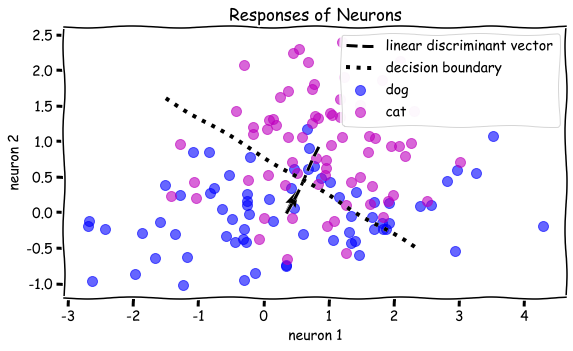

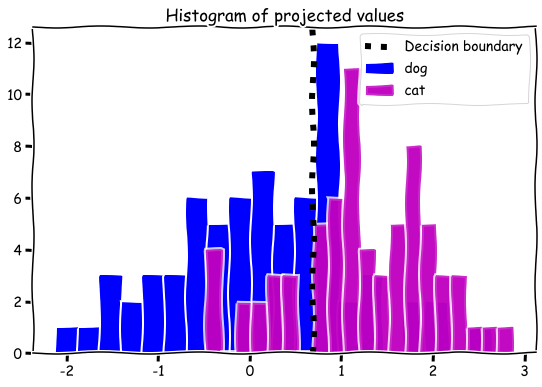

In [10]:
#load the dataset
fisherData = loadmat('fisherData.mat')
data1 = fisherData['data1'] #mouse neuron responses for dog barks 
data2 = fisherData['data2'] #mouse neuron responses for cat vocalization

#find the discriminant vector
#means of the two datasets
mu1 = np.mean(data1, axis = 0)
mu2 = np.mean(data2, axis = 0)

#find the decision boundary (The perpendicular bisector of the two means)
#first find the gradient of the decision boundary. 
grad = (mu2[1] - mu1[1])/(mu2[0] - mu1[0])  #find the gradiant of the means vector and * -1
grad_db = -1/grad

#find the line of the decision boundary to plot
midpnt = (mu2 + mu1)/2
c = midpnt[1] - grad_db * midpnt[0]

#create some data points to plot decision boundary 
x = np.arange(-1.5, 2.5, 0.1)
y = grad_db * x + c

#find the prototype discriminant vector and the unit vector of that
wp = (mu2 - mu1)
wp = wp/np.linalg.norm(wp)
origin = [mu1[0]], [mu1[1]]


#plot the two datasets
plt.figure(figsize = (9,5))
plt.scatter(data1[:,0], data1[:,1], s = 100, color = 'b', label = 'dog', alpha = 0.6, edgecolor = 'b')
plt.scatter(data2[:,0], data2[:,1], s = 100, color = 'm', label = 'cat', alpha = 0.6, edgecolor = 'm')
plt.quiver(*origin, wp[0],wp[1], color = 'k', angles = 'xy', scale_units = 'xy')
plt.plot([mu1[0], mu2[0]], [mu1[1], mu2[1]], linestyle = '--', color = 'k', linewidth = 3, label = 'linear discriminant vector')
plt.plot(x,y, color = 'k', linestyle = ':', linewidth = 4, label = 'decision boundary')
plt.xlabel('neuron 1')
plt.ylabel('neuron 2')
plt.title('Responses of Neurons')
plt.legend()
plt.show()

#use the decision boundary to classify the data
#first project the data to the wp vector

data1_wp = data1 @ wp
data2_wp = data2 @ wp 

#plot the distributions
plt.figure(figsize = (9,6))
plt.hist(data1_wp, bins = 20, color = 'b', label = 'dog')
plt.hist(data2_wp, bins = 20, color = 'm', label = 'cat', alpha = 0.8)
plt.axvline(midpnt @ wp, ymin = 0, ymax = 12, color = 'k', linewidth = 6, linestyle = ':', label = 'Decision boundary')
plt.title('Histogram of projected values')
plt.legend()
plt.show()

In [11]:
#find the number of correct points
df1 = pd.DataFrame(data1_wp)
#1 if correctly predicted else 0
df1['Correct'] = [1 if x < midpnt @ wp else 0 for x in df1[0]]

print('Correct Prediction its a dog barking', np.round(np.sum(df1['Correct'])/len(df1),4))

df2 = pd.DataFrame(data2_wp)
df2['Correct'] = [1 if x > midpnt @ wp else 0 for x in df2[0]]

print('Correct Prediction its a cat', np.round(np.sum(df2['Correct'])/len(df2),4))


Correct Prediction its a dog barking 0.6714
Correct Prediction its a cat 0.8


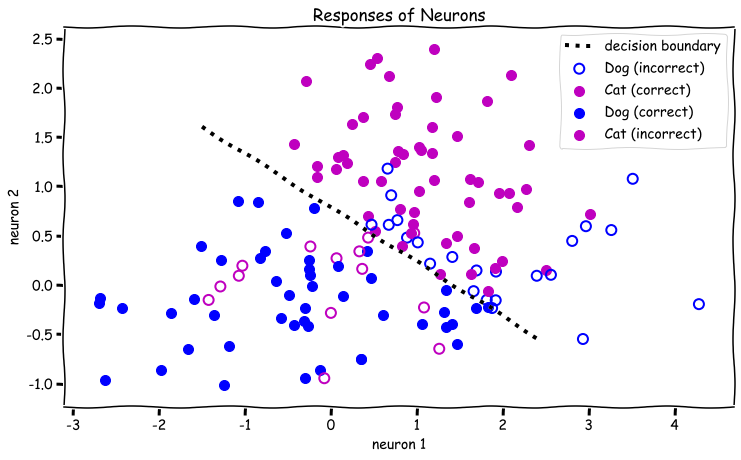

In [12]:
#plot the two datasets
plt.figure(figsize = (12,7))

for i in range(len(df1)):
    
    if df1['Correct'][i] == 1:
        plt.scatter(data1[i,0], data1[i,1], s = 100, color = 'b', edgecolor = 'b')
    else:
        plt.scatter(data1[i,0], data1[i,1], s = 100, facecolor = 'None', edgecolor = 'b', linewidth = 2)
    
    if df2['Correct'][i] == 1:
        plt.scatter(data2[i,0], data2[i,1], s = 100, color = 'm', edgecolor = 'm')
    else:
        plt.scatter(data2[i,0], data1[i,1], s = 100, facecolor = 'None', edgecolor = 'm', linewidth = 2)

plt.plot(x,y, color = 'k', linestyle = ':', linewidth = 4)
plt.xlabel('neuron 1')
plt.ylabel('neuron 2')
plt.title('Responses of Neurons')
plt.legend(['decision boundary', 'Dog (incorrect)', 'Cat (correct)', 'Dog (correct)', 'Cat (incorrect)'])
plt.show()

<u> part b </u>

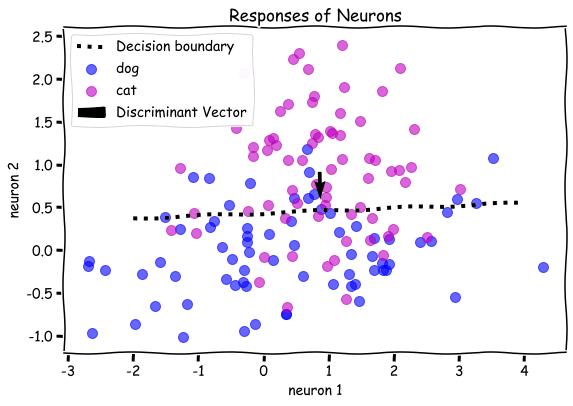

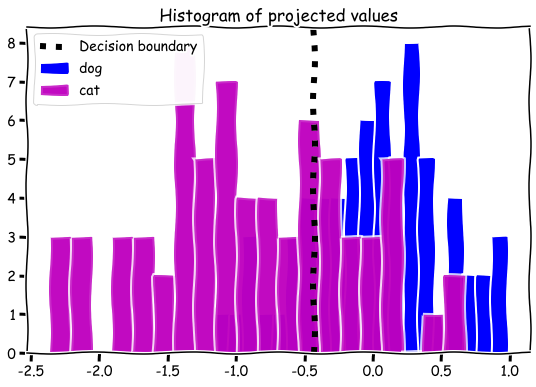

In [13]:
#optimal disciminant vector
#find covariance matrix
C1 = data1.T @ data1
C2 = data2.T @ data2

C = 1/2 * (C1 + C2)

#optima vector
w_ld = np.linalg.inv(C) @ (np.mean(data1, axis = 0) - np.mean(data2, axis = 0))
w_ld = w_ld/np.linalg.norm(w_ld)

#find the decision boundary 
#find the gradient 
grad = w_ld[1]/w_ld[0]
grad_p = -1/grad #perpendicular gradient 

#create a new line
#intercept
c = midpnt[1] - grad_p * midpnt[0]

#some x values
x = np.arange(-2, 4, 0.1)
y = grad_p * x + c


#origin
origin = [mu2[0]], [mu2[1]]

#plot the two datasets
plt.figure(figsize = (9,6))
plt.scatter(data1[:,0], data1[:,1], s = 100, color = 'b', label = 'dog', alpha = 0.6, edgecolor = 'b')
plt.scatter(data2[:,0], data2[:,1], s = 100, color = 'm', label = 'cat', alpha = 0.6, edgecolor = 'm')
plt.quiver(*origin, w_ld[0],w_ld[1], color = 'k', angles = 'xy', scale_units = 'xy', label = 'Discriminant Vector')
plt.plot(x, y, linestyle = ':', linewidth = 4, label = 'Decision boundary')
plt.xlabel('neuron 1')
plt.ylabel('neuron 2')
plt.title('Responses of Neurons')
plt.legend()
plt.show()

#project the data to the discriminant vector
data1_ld = data1 @ w_ld
data2_ld = data2 @ w_ld

#plot the histogram
plt.figure(figsize = (9,6))
plt.hist(data1_ld, bins = 20, color = 'b', label = 'dog')
plt.hist(data2_ld, bins = 20, color = 'm', label = 'cat', alpha = 0.8)
plt.axvline(midpnt @ w_ld, ymin = 0, ymax = 14, color = 'k', linewidth = 6, linestyle = ':', label = 'Decision boundary')
plt.title('Histogram of projected values')
plt.legend()
plt.show()


In [14]:
#find the number of correct points
df1_ld = pd.DataFrame(data1_ld)
#1 if correctly predicted else 0
df1_ld['Correct'] = [1 if x > midpnt @ w_ld else 0 for x in df1_ld[0]]

print('Correct Prediction its a dog barking', np.round(np.sum(df1_ld['Correct'])/len(df1_ld),4))

df2_ld = pd.DataFrame(data2_ld)
df2_ld['Correct'] = [1 if x < midpnt @ w_ld else 0 for x in df2_ld[0]]

print('Correct Prediction its a cat', np.round(np.sum(df2_ld['Correct'])/len(df2_ld),4))

Correct Prediction its a dog barking 0.8
Correct Prediction its a cat 0.7286


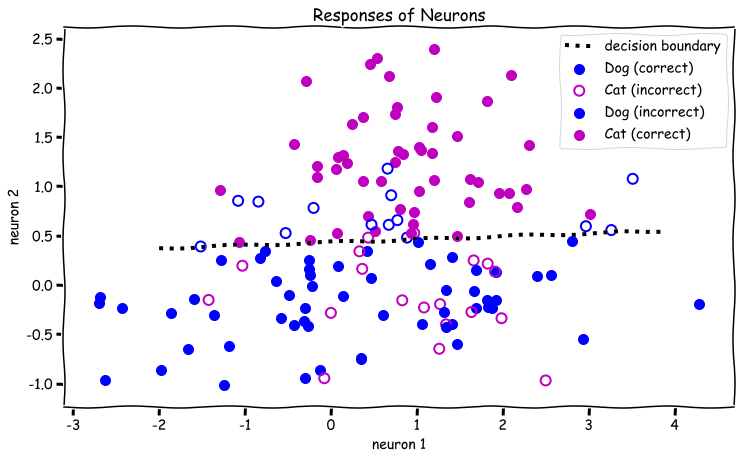

In [15]:
#plot the two datasets
plt.figure(figsize = (12,7))

for i in range(len(df1_ld)):
    
    if df1_ld['Correct'][i] == 1:
        plt.scatter(data1[i,0], data1[i,1], s = 100, color = 'b', edgecolor = 'b')
    else:
        plt.scatter(data1[i,0], data1[i,1], s = 100, facecolor = 'None', edgecolor = 'b', linewidth = 2)
    
    if df2_ld['Correct'][i] == 1:
        plt.scatter(data2[i,0], data2[i,1], s = 100, color = 'm', edgecolor = 'm')
    else:
        plt.scatter(data2[i,0], data1[i,1], s = 100, facecolor = 'None', edgecolor = 'm', linewidth = 2)

plt.plot(x,y, color = 'k', linestyle = ':', linewidth = 4)
plt.xlabel('neuron 1')
plt.ylabel('neuron 2')
plt.title('Responses of Neurons')
plt.legend(['decision boundary', 'Dog (correct)', 'Cat (incorrect)', 'Dog (incorrect)', 'Cat (correct)'])
plt.show()

<u> part c </u>

In [16]:
def flda(lam, data1, data2, test1, test2):
    
    #find the covariance matrices
    C1 = data1.T @ data1
    C2 = data2.T @ data2
    C = (C1 + C2)/2
    
    #find the midpoint
    mu1 = np.mean(data1, axis = 0)
    mu2 = np.mean(data2, axis = 0)
    midpnt = (mu1 + mu2)/2
    
    #C estimated
    Cest = (1 - lam) * C + lam * np.identity(len(C))
    
    #fisher discriminant vector
    w = np.linalg.inv(Cest) @ (mu1 - mu2)
    w = w/np.linalg.norm(w)
    
    #project the data to the discriminant vector
    data1_ld = data1 @ w
    data2_ld = data2 @ w
    
    #put into a pandas dataframe and classify
    df1 = pd.DataFrame(data1_ld)
    df1['Correct'] = [1 if x > midpnt @ w else 0 for x in df1[0]]
    train_ac1 = np.round(np.sum(df1['Correct'])/len(df1),4)
    
    df2 = pd.DataFrame(data2_ld)
    df2['Correct'] = [1 if x < midpnt @ w else 0 for x in df2[0]]
    train_ac2 = np.round(np.sum(df2['Correct'])/len(df2),4)
    
    #test accuracy 
    test1_ld = test1 @ w
    test2_ld = test2 @ w
    
    #put to a dataframe
    tst1 = pd.DataFrame(test1_ld)
    tst1['Correct'] = [1 if x > midpnt @ w else 0 for x in tst1[0]]
    test_ac1 = np.round(np.sum(tst1['Correct'])/len(tst1),4)
    
    tst2 = pd.DataFrame(test2_ld)
    tst2['Correct'] = [1 if x < midpnt @ w else 0 for x in tst2[0]]
    test_ac2 = np.round(np.sum(tst2['Correct'])/len(tst2),4)
       
    return test_ac1, test_ac2

In [17]:
#create a pandas dataframe that contains both the datasets
#shuffle the datasets
dat1 = pd.DataFrame(data1)
dat1['Col'] = 1
dat2 = pd.DataFrame(data2)
dat2['Col'] = 2
df = pd.concat([dat1, dat2], axis = 0)
df = df.sample(frac = 1).reset_index(drop = True)

In [18]:
#split the dataset 
test = df.iloc[0:40]
d1_test = test[test['Col'] == 1]
d2_test = test[test['Col'] == 2]

test1 = np.array([d1_test[0].values, d1_test[1].values]).T
test2 = np.array([d2_test[0].values, d2_test[1].values]).T

train = df.iloc[40:140]
d1_train = train[train['Col'] == 1]
d2_train = train[train['Col'] == 2]

train1 = np.array([d1_train[0].values, d1_train[1].values]).T
train2 = np.array([d2_train[0].values, d2_train[1].values]).T


In [19]:
kf7 = KFold(n_splits  = 20, shuffle=False)

#testing lambda values
lams = np.arange(0,1.05, 0.05)

#list to append the cv accuracies for each class
cv_d = []
cv_c = []

for lam in lams:
    
    accuracy_dog = []
    accuracy_cat = []
    
    for tr, ts in kf7.split(range(len(df))):

            #seperate the train and test and make two arrays to send to the lda function
            #train set
            train_set = df.iloc[tr]
            d1_train = train_set[train_set['Col'] == 1]
            d2_train = train_set[train_set['Col'] == 2]

            #the two arrays going into the function lda
            train1 = np.array([d1_train[0].values, d1_train[1].values]).T
            train2 = np.array([d2_train[0].values, d2_train[1].values]).T

            #test set
            test_set = df.iloc[ts]
            d1_test = test_set[test_set['Col'] == 1]
            d2_test = test_set[test_set['Col'] == 2]

            #the two arrays going into the lda function
            test1 = np.array([d1_test[0].values, d1_test[1].values]).T
            test2 = np.array([d2_test[0].values, d2_test[1].values]).T

            #lda to classify
            ac1, ac2 = flda(lam, train1, train2, test1, test2)

            accuracy_dog.append(ac1)
            accuracy_cat.append(ac2)
                                    
    cv_d.append(accuracy_dog)
    cv_c.append(accuracy_cat)

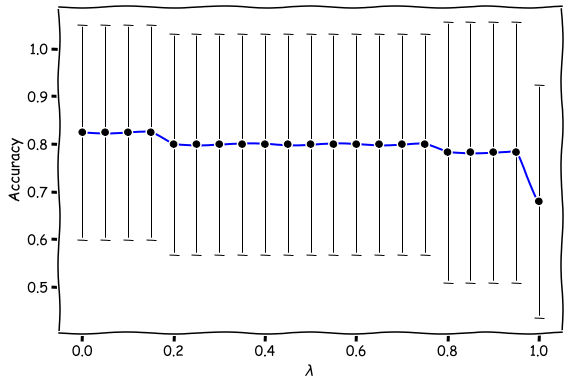

In [65]:
plt.figure(figsize = (9,6))
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

for i in range(len(cv_d)):
    # construct some data like what you have:
    mins = np.min(cv_d[i])
    maxes = np.max(cv_d[i])
    means = np.mean(cv_d[i])
    std = np.std(cv_d[i])

    # create stacked errorbars:
    plt.errorbar(lams[i], means, std, fmt='ok', lw=1, capthick = 1, capsize = 5)
    

plt.plot(lams, np.mean(cv_d, axis = 1), color = 'b')
plt.show()

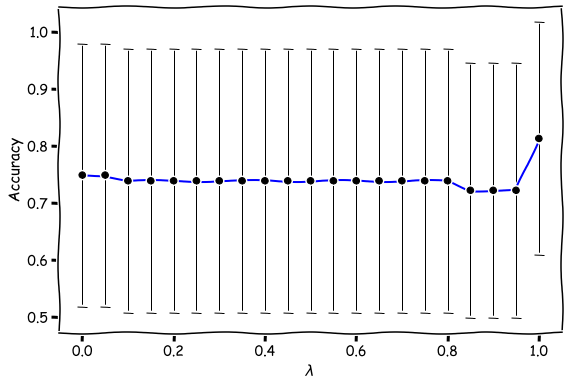

In [66]:
plt.figure(figsize = (9,6))
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

for i in range(len(cv_c)):
    # construct some data like what you have:
    mins = np.min(cv_c[i])
    maxes = np.max(cv_c[i])
    means = np.mean(cv_c[i])
    std = np.std(cv_c[i])

    # create stacked errorbars:
    plt.errorbar(lams[i], means, std, fmt='ok', lw=1, capthick = 1, capsize = 5)
    
plt.plot(lams, np.mean(cv_c, axis = 1), color = 'b')
plt.show()

part d

In [67]:
#measure the mean and covariance for each dataset
C1 = data1.T @ data1
C2 = data2.T @ data2

#mean of the two datasets
mu1 = np.mean(data1, axis = 0)
mu2 = np.mean(data2, axis = 0)

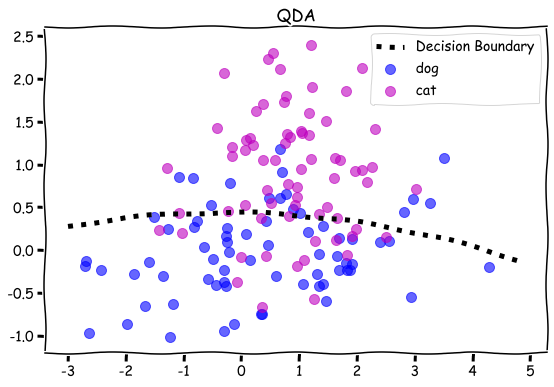

In [68]:
#create the qda boundary 
xx = np.arange(-3, 5, 0.1)
y = []

for x in xx:
    
    deltad = -1/2 * np.log(np.linalg.det(C1)) - 1/2 * (x - mu1) @ np.linalg.pinv(C1) @ (x - mu1).T
    deltac = -1/2 * np.log(np.linalg.det(C2)) - 1/2 * (x - mu2) @ np.linalg.pinv(C2) @ (x - mu2).T
    y.append(deltad - deltac)


plt.figure(figsize = (9,6))
plt.title('QDA')
plt.scatter(data1[:,0], data1[:,1], s = 100, color = 'b', label = 'dog', alpha = 0.6, edgecolor = 'b')
plt.scatter(data2[:,0], data2[:,1], s = 100, color = 'm', label = 'cat', alpha = 0.6, edgecolor = 'm')
plt.plot(xx,y, linestyle = ':', linewidth =  5, label = 'Decision Boundary')
plt.legend()
plt.show()

In [69]:
#find the number of correct points
response_d = []

#1 if correctly predicted else 0
for i in range(len(data1)):
    
    deltad = -1/2 * np.log(np.linalg.det(C1)) - 1/2 * (data1[i][0] - mu1) @ np.linalg.pinv(C1) @ (data1[i][0] - mu1).T
    deltac = -1/2 * np.log(np.linalg.det(C2)) - 1/2 * (data1[i][0] - mu2) @ np.linalg.pinv(C2) @ (data1[i][0] - mu2).T
    
    if np.round(deltad - deltac,8) > data1[i][1]:
        response_d.append(1)
    else:
        response_d.append(0)

print('number of correct responses', np.round(np.sum(response_d)/len(response_d),4))


#find the number of correct points
response_c = []

#1 if correctly predicted else 0
for i in range(len(data2)):
    
    deltad = -1/2 * np.log(np.linalg.det(C1)) - 1/2 * (data2[i][0] - mu1) @ np.linalg.pinv(C1) @ (data2[i][0] - mu1).T
    deltac = -1/2 * np.log(np.linalg.det(C2)) - 1/2 * (data2[i][0] - mu2) @ np.linalg.pinv(C2) @ (data2[i][0] - mu2).T
    
    if np.round(deltad - deltac,8) < data2[i][1]:
        response_c.append(1)
    else:
        response_c.append(0)

print('number of correct responses', np.round(np.sum(response_c)/len(response_c),4))

number of correct responses 0.7857
number of correct responses 0.7571


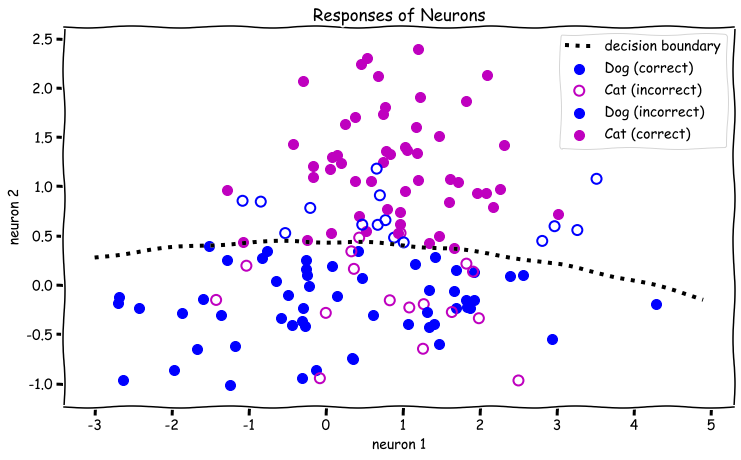

In [70]:
#plot the two datasets
plt.figure(figsize = (12,7))

for i in range(len(data1)):
    
    if response_d[i] == 1:
        plt.scatter(data1[i,0], data1[i,1], s = 100, color = 'b', edgecolor = 'b')
    else:
        plt.scatter(data1[i,0], data1[i,1], s = 100, facecolor = 'None', edgecolor = 'b', linewidth = 2)
    
    if response_c[i] == 1:
        plt.scatter(data2[i,0], data2[i,1], s = 100, color = 'm', edgecolor = 'm')
    else:
        plt.scatter(data2[i,0], data1[i,1], s = 100, facecolor = 'None', edgecolor = 'm', linewidth = 2)

plt.plot(xx,y, color = 'k', linestyle = ':', linewidth = 4)
plt.xlabel('neuron 1')
plt.ylabel('neuron 2')
plt.title('Responses of Neurons')
plt.legend(['decision boundary', 'Dog (correct)', 'Cat (incorrect)', 'Dog (incorrect)', 'Cat (correct)'])
plt.show()

**PROBLEM 3**

a)

In [98]:
#laod the dataset
mat = loadmat('regress1.mat')

X = mat['x']
y = mat['y']

#build the polynomial order 5 model

x1 = np.ones(len(X)).reshape(len(X),1)
x2 = X
x3 = X**2
x4 = X**3
x5 = X**4
x6 = X**5

XX = np.hstack((x1,x2,x3,x4,x5,x6))

#find beta0 and beta1

def ridge_regression(x, y, lam):
    
    betas_r = np.linalg.pinv((x.T @ x + lam * np.identity(x.shape[1]))) @ x.T @ y
    
    return betas_r

def lasso_regression(betas, x, y, lam):
    
    betas_v = np.array(betas)
    betas_v = betas_v.reshape(len(betas_v),1)
    term1 = x @ betas_v
    term1 = term1.reshape(len(x), 1)
    
    val = np.linalg.norm(y - term1)**2 + lam * np.sum(np.abs(betas_v), axis = 0)
    
    return val
    

In [99]:
#try different lambda values
lams = np.arange(0.5, 20.5, 1)

kf = KFold(n_splits  = 20, shuffle=False)

#
ridge_mse = []
lasso_mse = []

betas_r = []
betas_l = []

for lam in lams:
    
    betas_ridge_cv = []
    ridge_mse_cv = []
    
    betas_lasso_cv = []
    lasso_mse_cv = []
    
    for tr, ts in kf.split(range(len(XX))):
        
        #train set
        train_x = XX[tr]
        train_y = y[tr]
        
        #test set
        test_X = XX[ts]
        test_y = y[ts]
        
        #apply ridge regression
        betas_ridge = ridge_regression(train_x, train_y, lam)
        y_pred_ridge = test_X @ betas_ridge
               
        #calculate the mse 
        mse = (test_y - y_pred_ridge)**2
                
        #collect the values
        ridge_mse_cv.append(np.sum(mse))
        betas_ridge_cv.append(betas_ridge)
        
        #apply lasso
        betas_lasso = opt.fmin(lasso_regression, x0 = [-0.1,-0.1,-0.1,0.1,0.1,0.1], args = (train_x,train_y,lam), disp = False)
        y_pred_lasso = test_X @ betas_lasso
        y_pred_lasso = y_pred_lasso.reshape(len(y_pred_lasso), 1)
               
        #calculate mse
        mse_lasso = (test_y - y_pred_lasso)**2      
        
        #collect vals
        lasso_mse_cv.append(np.sum(mse_lasso))
        betas_lasso_cv.append(betas_lasso)
        
    betas_l.append(np.mean(np.array(betas_lasso_cv), axis = 0))
    betas_r.append(np.mean(np.array(betas_ridge_cv), axis = 0))
    ridge_mse.append(np.mean(np.array(ridge_mse_cv), axis = 0))
    lasso_mse.append(np.mean(np.array(lasso_mse_cv), axis = 0))

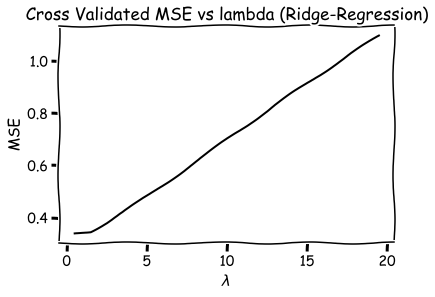

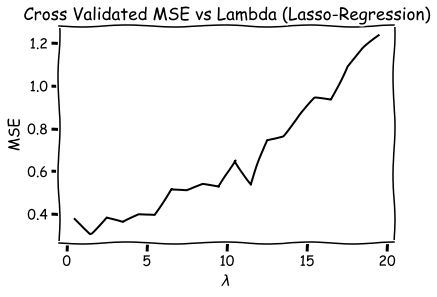

In [100]:
plt.figure()
plt.title('Cross Validated MSE vs lambda (Ridge-Regression)', fontsize = 17)
plt.plot(lams, ridge_mse)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()

plt.title('Cross Validated MSE vs Lambda (Lasso-Regression)', fontsize = 17)
plt.plot(lams, lasso_mse)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()

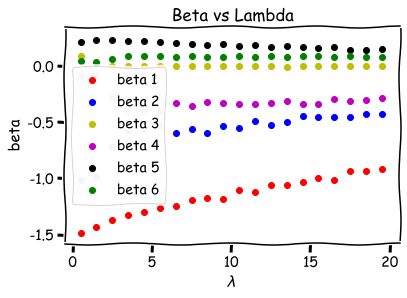

In [101]:
#plot the beta vs lambda values 
#lasso regression
plt.figure()
plt.title('Beta vs Lambda')
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('beta', fontsize = 15)

for i in range(len(lams)):
    plt.scatter(lams[i], betas_l[i][0], label = 'beta_1', color = 'r')
    plt.scatter(lams[i], betas_l[i][1], label = 'beta_2', color = 'b')
    plt.scatter(lams[i], betas_l[i][2], label = 'beta_3', color = 'y')
    plt.scatter(lams[i], betas_l[i][3], label = 'beta_4', color = 'm')
    plt.scatter(lams[i], betas_l[i][4], label = 'beta_5', color = 'k')
    plt.scatter(lams[i], betas_l[i][5], label = 'beta_6', color = 'g')
    
plt.legend(['beta 1', 'beta 2', 'beta 3', 'beta 4', 'beta 5', 'beta 6'])    
plt.show()

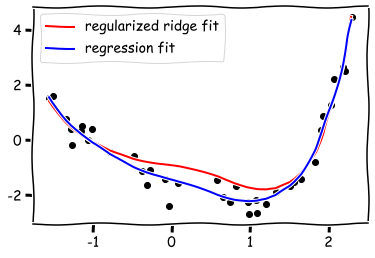

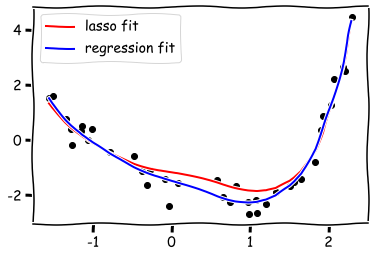

In [104]:
#select the lam = 0.8 for ridge
y_pred = XX @ betas_r[8]
y_pred_nr = XX @ betas_r[0]

#see how the data fit
plt.figure()
plt.scatter(X,y)
plt.plot(X, y_pred, color = 'r', label = 'regularized ridge fit')
plt.plot(X, y_pred_nr, color = 'b', label = 'regression fit')
plt.legend()
plt.show()

#lasso 
y_pred = XX @ betas_l[8]
y_pred_nr = XX @ betas_l[0]

#plot
plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'r', label = 'lasso fit')
plt.plot(X, y_pred_nr, color = 'b', label = 'regression fit')
plt.legend()
plt.show()

b) 

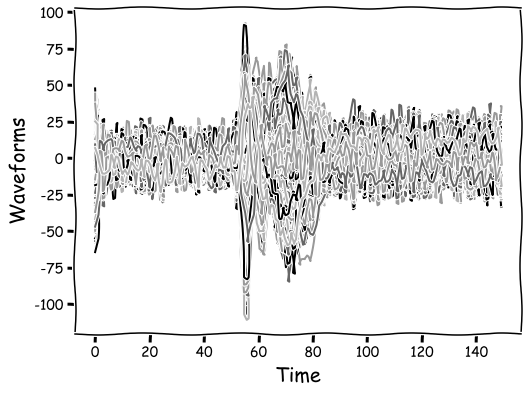

In [2]:
mat = loadmat('windowedSpikes.mat')

data = mat['data']

plt.xkcd()
plt.figure(figsize = (8,6))
plt.plot(data.T)
plt.xlabel('Time', fontsize= '20')
plt.ylabel('Waveforms', fontsize = '20')
plt.show()

In [5]:
import random
from scipy import linalg

#center the datset
meanmat = np.mean(data)
D = data - meanmat


#find the svd of the dataset
U,s,Vt = np.linalg.svd(D)
S = linalg.diagsvd(s, np.shape(D)[0], np.shape(D)[1])
print(S.shape)

(400, 150)


<IPython.core.display.Javascript object>


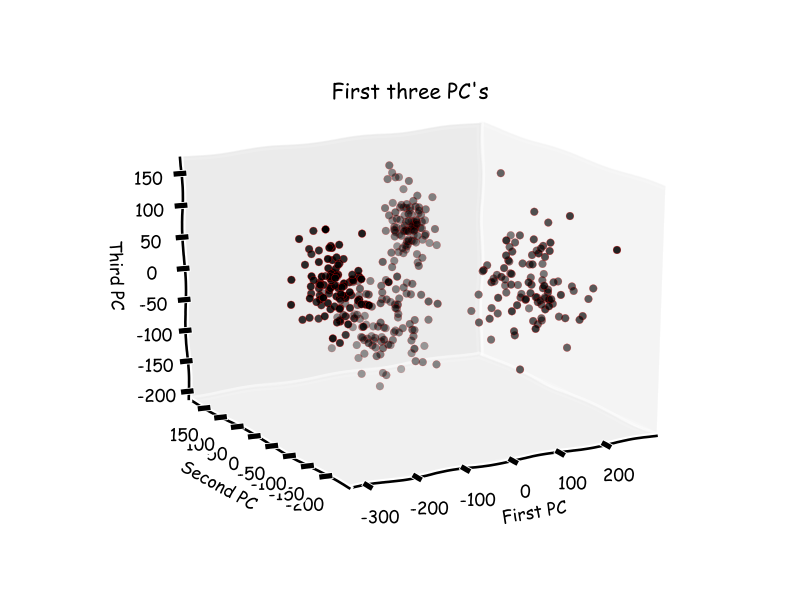

In [4]:
#first three pc's
pc1 = Vt[0, :]
pc2 = Vt[1, :]
pc3 = Vt[2, :]

%matplotlib notebook

#plot the data projected to the first three prinipal components 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("First three PC's")
ax.scatter(D @ pc1, D @ pc2, D @ pc3, s = 20, edgecolor = 'r', linewidth = 0.18)
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
plt.show()


In [13]:
#first three pc's in a numpy array 
dt = np.array([pc1, pc2, pc2])


#soft k mean clustering

class kmeans():
    
    def __init__(self, data, K):
        
        dt = self.data
        K = self.K
               
    def multivariate_gaussian(self, mu, cov, x):
        
        covinv = np.linalg.pinv(cov)
        
        N = 1 / (2 * np.pi)**(len(x)/2) * np.det(cov)**(1/2) * np.exp(-1/2 * (x - mu).T @ covinv @ (x - mu))
        
        return N
    
    
        
        
        
        
        
        
    